In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'frozen_inference_graph.pb'

In [6]:
model= cv2.dnn_DetectionModel(frozen_model, config_file)

In [7]:
classlabels = []
file_name='coco.names'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [8]:
print(classlabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [9]:
print(len(classlabels))

91


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000275DE668BD0>

In [11]:
img=cv2.imread('man-tuxedo-car-style-wallpaper-preview.jpg')

In [12]:
plt.imshow(img)

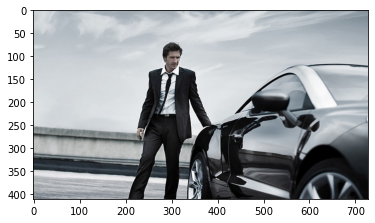

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
classIndex,confidece, bbox = model.detect(img, confThreshold = 0.5)

In [15]:
print(classIndex)

[3 1]


In [16]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    #cv2.putText(img,text,(text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness =1)
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img, classlabels[classInd -1], (boxes[0] + 10, boxes[1]+40), font, fontScale = font_scale, color = (0,255,0), thickness =3)

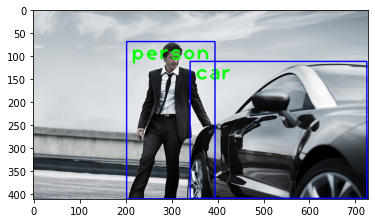

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap=cv2.VideoCapture('0')


# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    classIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if(classInd <= 80):
                cv2.rectangle(frame, boxes,(255,0,0), 2)
                cv2.putText(frame, classlabels[classInd-1], (boxes[0]+10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255,0), thickness = 3)
    cv2.imshow("object detection", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ 1 65]
[ 1 65]
[65  1]
[65  1]
[65]
[65 18]
[65 18]
[18 65]
[65 18]
[65  1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[65  1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[65  1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1  1 65]
[ 1  1 65]
[ 1 65 18]
[ 1 65]
[ 1 65]
[ 1 65]
[65]
[65]
[65]
[65  1]
[65  1]
[1]
[65  1]
[ 1 65]
[ 1 65]
[75  1 65]
[75  1]
[75  1]
[75  1]
[75  1]
[1]
[75  1]
[75  1 65]
[75  1 65]
[ 1 75]
[ 1 75]
[75  1]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 75 65]
[ 1 75]
[ 1 75]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[1]
[ 1 65]
[ 1 65  1]
[ 1 65  1]
[1]
[1]
[ 1 65  1]
[ 1 65